<a href="https://colab.research.google.com/github/ChristopherWilly/pypackfuncs/blob/master/wine_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn import datasets
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
wine_dataset = datasets.load_wine()

In [ ]:
print(wine_dataset.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [ ]:
wine_dataset.target[60]


1

In [ ]:

wine_dataset.data[0]

array([1.423e+01, 1.710e+00, 2.430e+00, 1.560e+01, 1.270e+02, 2.800e+00,
       3.060e+00, 2.800e-01, 2.290e+00, 5.640e+00, 1.040e+00, 3.920e+00,
       1.065e+03])

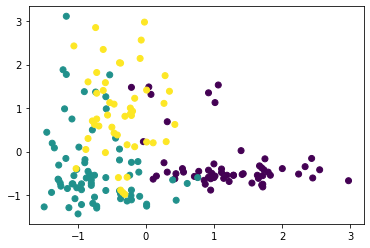

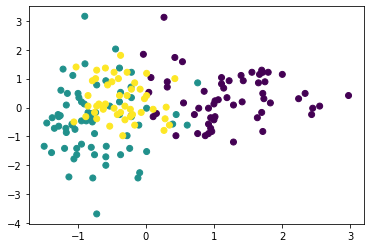

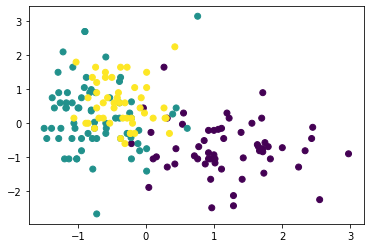

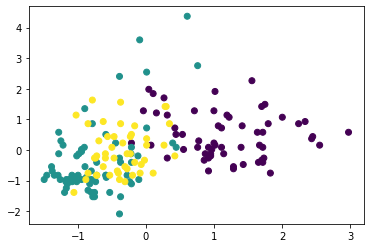

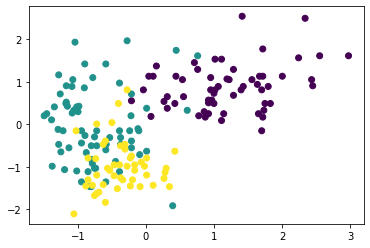

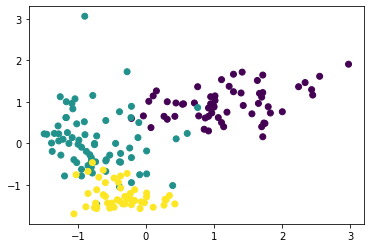

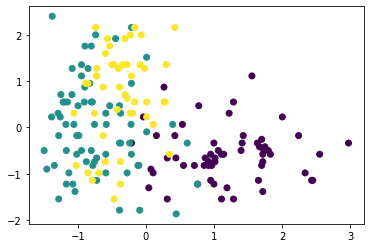

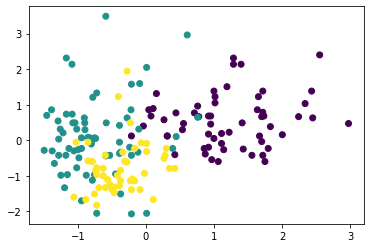

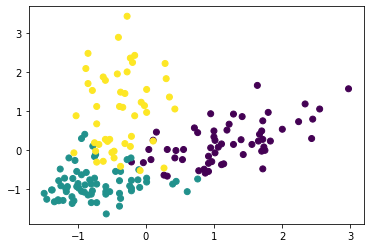

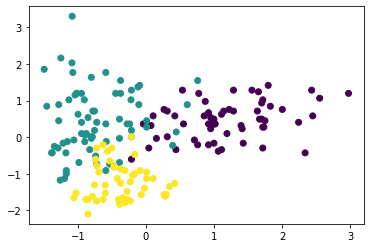

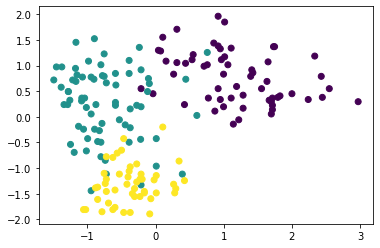

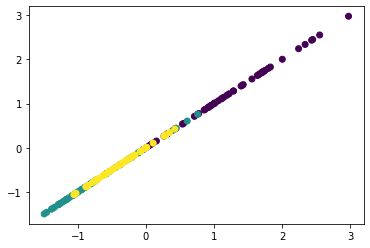

In [ ]:
x = scaler.fit_transform(wine_dataset.data)
y = wine_dataset.target
i = 12
## was thinking to check out different features compared to others if it could be done with less features
plt.scatter(x[:,i], x[:, 1],c=y)
plt.show()
plt.scatter(x[:,i], x[:, 2],c=y)
plt.show()
plt.scatter(x[:,i], x[:, 3],c=y)
plt.show()
plt.scatter(x[:,i], x[:, 4],c=y)
plt.show()
plt.scatter(x[:,i], x[:, 5],c=y)
plt.show()
plt.scatter(x[:,i], x[:, 6],c=y)
plt.show()
plt.scatter(x[:,i], x[:, 7],c=y)
plt.show()
plt.scatter(x[:,i], x[:, 8],c=y)
plt.show()
plt.scatter(x[:,i], x[:, 9],c=y)
plt.show()
plt.scatter(x[:,i], x[:, 10],c=y)
plt.show()
plt.scatter(x[:,i], x[:, 11],c=y)
plt.show()
plt.scatter(x[:,i], x[:, 12],c=y)
plt.show()

In [ ]:
def sigmoid(x):
  return(1/(1+math.e**(-x)))

In [ ]:
def loss(sample,predict):
  return-(sample * math.log(predict) +(1.0-sample)*math.log(1.0-predict))

In [ ]:
def predict(sample):
  result = 0.0
  m = len(sample)
  for i in range(m):
    result = result + weights[i] * sample[i]
  result = result + bias
  return sigmoid(result)

In [ ]:
num_feature = wine_dataset.data.shape[1]
print(num_feature)
weights = [0.0] *num_feature
bias = 0.0
learning_rate = 0.1
x = [0.1, 3]
test = scaler.fit_transform(wine_dataset.data)
test[0:1, 0]

13


array([1.51861254])

In [ ]:
def train_one_epoch(x_train,y_train):
  global num_feature, weights, bias
  dw = [0.0] * num_feature
  db = 0.0
  cost = 0.0
  m = len(x_train)

  for i in range(m):
    x_sample = x_train[i]
    predicted = predict(x_sample)
    y_sample = y_train[i]
    cost = cost + loss(y_sample,predicted)

    dz = predicted - y_sample
    for j in range(len(weights)):
      dw[j] = dw[j] + x_sample[j] * dz
    db = db + dz

  cost = cost / m
  db = db / m
  bias = bias - learning_rate*db
  for k in range(len(weights)):
    dw[k] = dw[k]/m
    weights[k] = weights[k] - dw[k]*learning_rate
  return cost

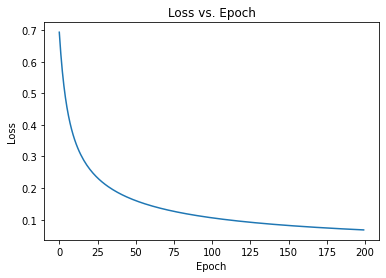

[0.6931471805599465, 0.6245241542462626, 0.5691454611834631, 0.5239937996662242, 0.48670334132945775, 0.45548142726110336, 0.42898837654989186, 0.40622449835552665, 0.3864395766236225, 0.36906523527838, 0.3536659368201551, 0.3399038817640179, 0.3275138865144684, 0.31628531336248733, 0.30604896657241343, 0.2966674960459746, 0.2880282949831415, 0.2800381863264962, 0.27261940472351903, 0.2657065263511699, 0.2592440993854027, 0.2531847976375687, 0.24748796869626286, 0.2421184823890175, 0.23704580995250113, 0.23224328198091937, 0.2276874860623069, 0.22335777442201013, 0.21923585884966673, 0.21530547537382522, 0.21155210504895233, 0.20796274017566904, 0.20452568753242473, 0.20123040193322372, 0.19806734477103272, 0.19502786325531238, 0.19210408687519995, 0.18928883826977108, 0.1865755562029626, 0.18395822875298942, 0.18143133515710158, 0.17898979501970924, 0.1766289238085934, 0.17434439374053123, 0.17213219930222726, 0.16998862677132, 0.16791022720037935, 0.16589379240817617, 0.1639363335902

In [ ]:

epochs = 200

x_train_samples = scaler.fit_transform(wine_dataset.data)
y_train_samples = [1 if y == 0 else 0 for y in wine_dataset.target]

loss_array = []
for epoch in range(epochs):
  loss_value = train_one_epoch(x_train_samples, y_train_samples)
  loss_array.append(loss_value)

plt.plot(range(epochs), loss_array)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Loss vs. Epoch')
plt.show()
print(loss_array)

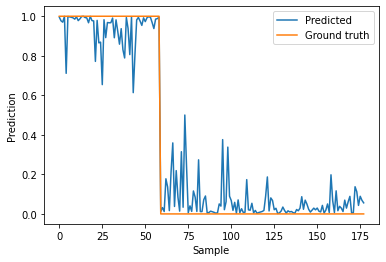

Accuracy: 99.44 %


In [ ]:
#copy pasted this cell but others were written by hand and sometimes checked out iris model as reference
predictions = []

m = len(x_train_samples)
correct = 0
for i in range(m):
  sample = x_train_samples[i]
  value = predict(sample)
  predictions.append(value)
  if value >= 0.5:
    value = 1
  else:
    value = 0
  if value == y_train_samples[i]:
    correct = correct + 1.0

plt.plot(range(m), predictions, label='Predicted')
plt.plot(range(m), y_train_samples, label='Ground truth')
plt.ylabel('Prediction')
plt.xlabel('Sample')
plt.legend(loc='best')
plt.show()

print('Accuracy: %.2f %%' % (100 * correct/m))